Shujah Chaudhary

OPIM 3511: Data Analytics II

The objective is to develop and compare the performance of a Logistic Regression model and a K-means clustering model for predicting whether cancer cells are benign or malignant. The primary goal is to determine which model exhibits superior accuracy in detecting the two classes of cancer cells, thereby providing more reliable predictions for clinical decision-making. 

**Setting Up Environment**

In [38]:
# Importing Libraries and creating data frame


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
df = pd.read_csv('/content/Cancer_Data.csv')


**Data Exploration**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

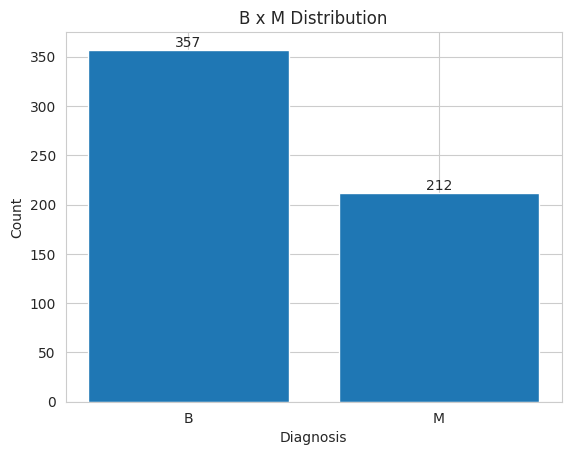

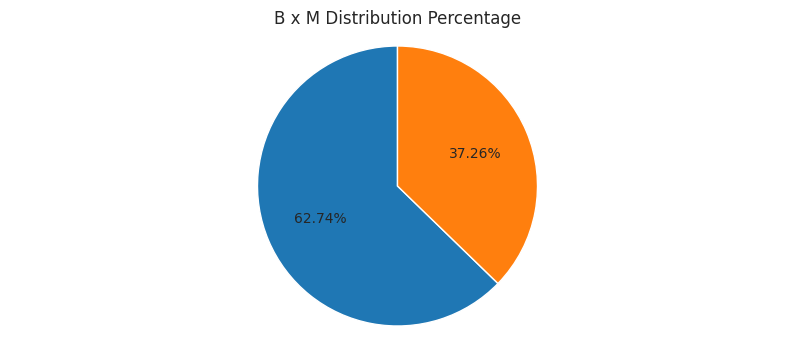

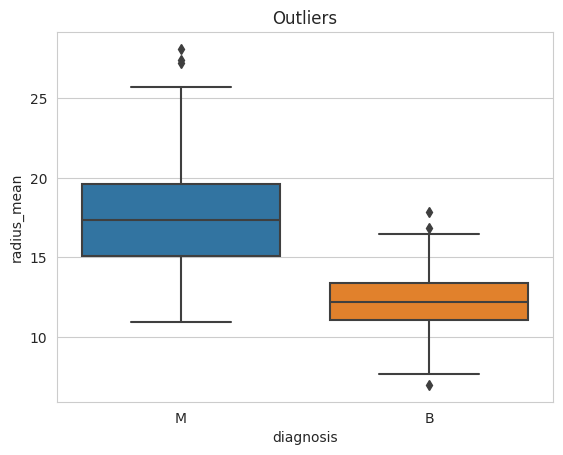

In [39]:
# Basic Info about data set

print(df.info())
print(df.head())

#distribution of the diagnosis column our target variable
diagnosis_counts = df['diagnosis'].value_counts()
fig, ax = plt.subplots()

bars = ax.bar(diagnosis_counts.index, diagnosis_counts.values)
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')

ax.bar_label(bars)
plt.title("B x M Distribution")
plt.show()
#distribution of the diagnosis column our target variable

plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
plt.pie(df['diagnosis'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("B x M Distribution Percentage")
plt.show()


#the distribution of a continuous feature, identify potential trends, outliers, or differences
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title("Outliers")
plt.show()

**Data Pre-proccessing**

In [40]:
# Remove irrelevant columns 
print('Before Removal: ' + str(df.shape))
df = df.drop(labels="Unnamed: 32", axis=1)
df = df.drop(labels="id", axis=1)
print('After Removal: ' + str(df.shape))

Before Removal: (569, 33)
After Removal: (569, 31)


Data shape before removing outliers: (569, 31)
Data shape after removing outliers: (563, 31)


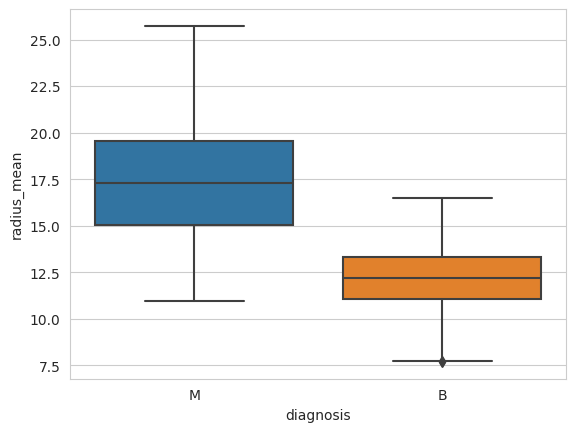

In [41]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Filtering data separately for each diagnosis group
df_M = df[df['diagnosis'] == 'M']
df_B = df[df['diagnosis'] == 'B']

print("Data shape before removing outliers:", df.shape)

df_M_filtered = remove_outliers_iqr(df_M, 'radius_mean')
df_B_filtered = remove_outliers_iqr(df_B, 'radius_mean')

# Combining the filtered data back together
df_filtered = pd.concat([df_M_filtered, df_B_filtered])

print("Data shape after removing outliers:", df_filtered.shape)

# Boxplot using the filtered data to showcase removal of outliers
sns.boxplot(x='diagnosis', y='radius_mean', data=df_filtered)
plt.show()


In [42]:
# features and target
X = df_filtered.drop('diagnosis', axis=1)
y = df_filtered['diagnosis']

# standardize feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=44)

**Logistic Regression**

Accuracy: 98.22%

Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       109
           M       0.98      0.97      0.97        60

    accuracy                           0.98       169
   macro avg       0.98      0.98      0.98       169
weighted avg       0.98      0.98      0.98       169



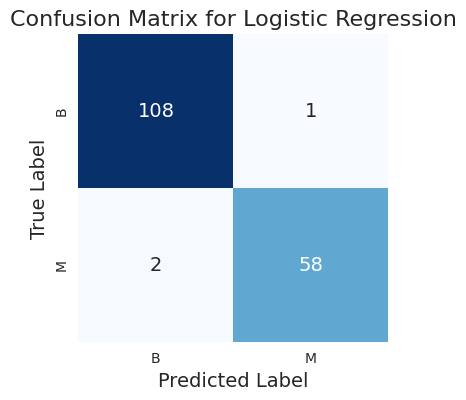

In [43]:
# logistic regression model
log_reg = LogisticRegression(random_state=42)

# Fiting model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

confusion_log_reg = confusion_matrix(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'fontsize': 14},
            xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.show()


Logistic Regression Summary:
The classification model demonstrates excellent performance, with an accuracy of 98.22%. The model has a high precision, recall, and F1-score for both classes (Benign and Malignant), indicating that it can accurately differentiate between the two classes with only a few misclassifications. Prority matrix reads as follows, True Negatives (TN): 108, False Positives (FP): 1, False Negatives (FN): 2, True Positives (TP): 58

**Kmeans Model**

First find the best n_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

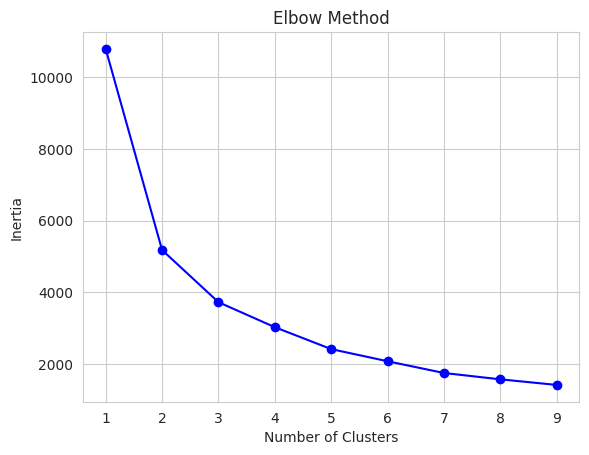

The optimal number of clusters:2


In [44]:

# labels to numeric values (M = 1, B = 0)
y_numeric = y.map({'B': 0, 'M': 1})

# PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=44)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)



# Elbow method graph
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_clusters = 2
print("The optimal number of clusters:" + str(optimal_clusters))

Now we can use the Kmean model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


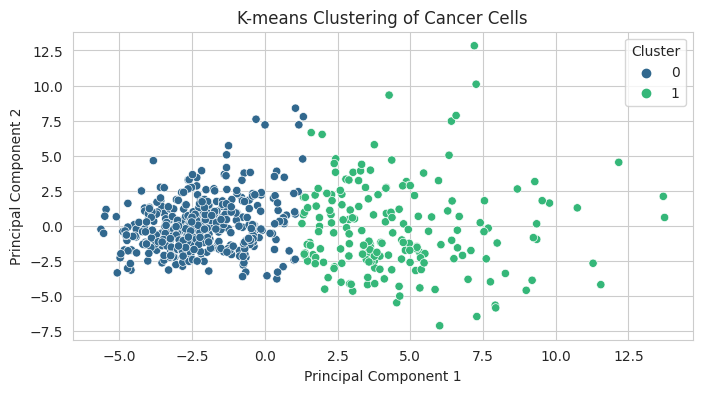

K-means Performance:

Accuracy: 91.47%


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       354
           1       0.94      0.82      0.88       209

    accuracy                           0.91       563
   macro avg       0.92      0.90      0.91       563
weighted avg       0.92      0.91      0.91       563



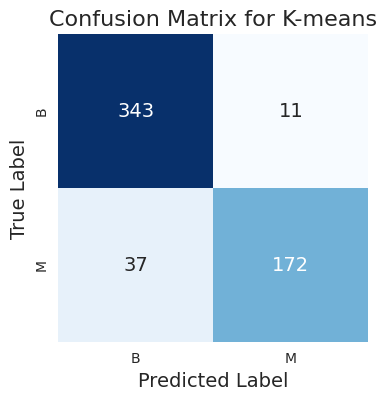

In [45]:
# Run K-means on the PCA transformed data
kmeans_pca = KMeans(n_clusters=2, random_state=44)
kmeans_pca.fit(X_pca)

# predicted cluster labels
y_pred_pca = kmeans_pca.labels_


if accuracy_score(y_numeric, y_pred_pca) < 0.5:
    y_pred_pca = 1 - y_pred_pca

# Assigning the clusters to the original dataset
df_filtered['cluster_pca'] = y_pred_pca

# Visualizing clusters using a scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], data=df_filtered, hue='cluster_pca', palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Cancer Cells')
plt.legend(title='Cluster')
plt.show()


# performance metrics
accuracy_kmeans_pca = accuracy_score(y_numeric, y_pred_pca)
confusion_kmeans_pca = confusion_matrix(y_numeric, y_pred_pca)
classification_kmeans_pca = classification_report(y_numeric, y_pred_pca)

# Printing performance metrics
print("K-means Performance:\n")
print(f"Accuracy: {accuracy_kmeans_pca * 100:.2f}%\n")


print("\nClassification Report:")
print(classification_kmeans_pca)

# Ploting the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_kmeans_pca, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'fontsize': 14},
            xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix for K-means', fontsize=16)
plt.show()

K-means Output Summary: the classification model demonstrates good performance, with an accuracy of 91.47%. The model has a high precision, recall, and F1-score for both classes (0 and 1), indicating that it can accurately differentiate between the two classes with a moderate number of misclassifications,priority matrix reads as follows True Negatives (TN): 343, False Positives (FP): 11 False Negatives (FN): 37, True Positives (TP): 172. 

Although the Logistical regression performed better in every way. K-means is an unsupervised learning method and is generally not used for classification tasks like this one, the model still performed well. Logistic regression is a more appropriate choice for binary classification.